In [ ]:
import pandas as pd
df=pd.DataFrame({
    "ÜSN":[21,22,23,24,25],
    "Name":["Sam","Ram","Dam","rahul","rakshith"],
    "Marks":[45,78,24,90,60]
})
df

,ÜSN,Name,Marks
0,21,Sam,45
1,22,Ram,78
2,23,Dam,24
3,24,rahul,90
4,25,rakshith,60


In [ ]:
from sklearn.datasets import load_diabetes
dia=load_diabetes()
df=pd.DataFrame(dia.data,columns=dia.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
filepath="/content/sample_sales_data.csv"
df=pd.read_csv(filepath)
df.head()

,Product,Quantity,Price,Sales,Region
0,Laptop,5,1000,5000,North
1,Mouse,15,20,300,West
2,Keyboard,10,50,500,East
3,Monitor,8,200,1600,South
4,Laptop,12,950,11400,North


In [ ]:
df=pd.read_csv("/content/Dataset of Diabetes .csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


[*********************100%***********************]  3 of 3 completed


Price             Close                                   High               \
Ticker      HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS  HDFCBANK.NS ICICIBANK.NS   
Date                                                                          
2024-01-01  1675.223999   990.869812  1907.059814  1686.125187   996.273246   
2024-01-02  1676.210571   973.866150  1863.008179  1679.860799   989.134730   
2024-01-03  1650.363525   975.650818  1863.857178  1681.735059   979.567116   
2024-01-04  1668.071777   978.724365  1861.559692  1672.116520   980.707295   
2024-01-05  1659.538208   985.218445  1845.577148  1681.932477   989.779158   

Price                            Low                                   Open  \
Ticker     KOTAKBANK.NS  HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS  HDFCBANK.NS   
Date                                                                          
2024-01-01  1916.899006  1669.206199   982.541485  1891.027338  1683.017598   
2024-01-02  1905.911108  1665.950651   971.883221  

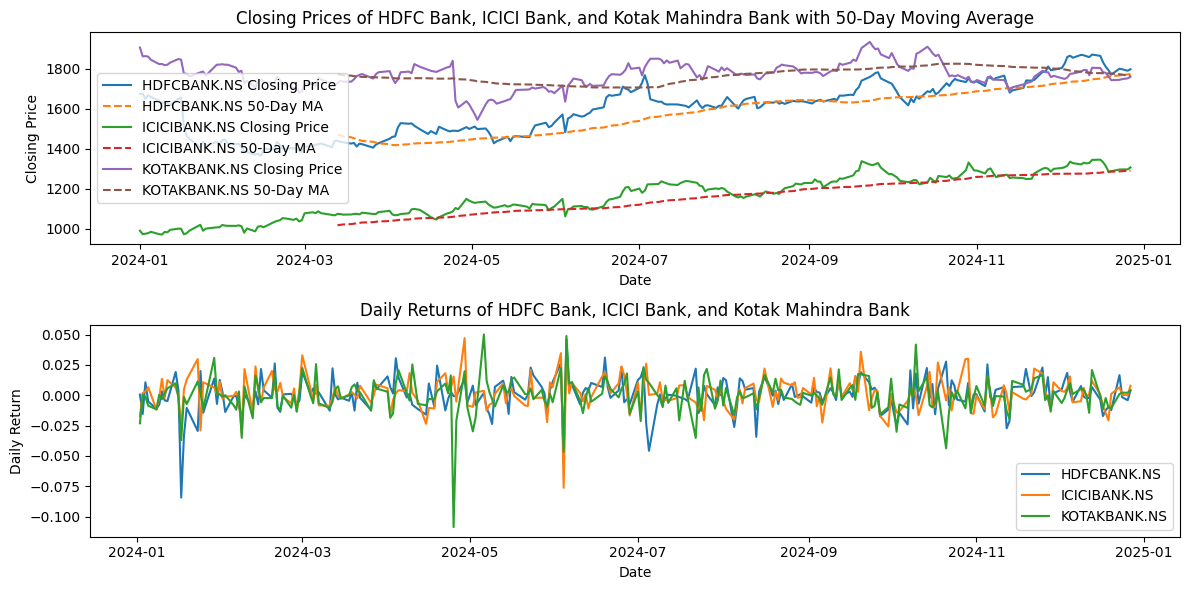

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers and date range
tickers = ["HDFCBANK.NS", "ICICIBANK.NS", "KOTAKBANK.NS"]
start_date = "2024-01-01"
end_date = "2024-12-30"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Check the structure of the downloaded data
print(data.head())  # Print the first few rows to see the column names

# Extract closing prices (if 'Adj Close' doesn't exist, fall back to 'Close')
closing_prices = data["Close"]

# Handle missing values by forward filling
closing_prices = closing_prices.ffill()

# Calculate daily returns
daily_returns = closing_prices.pct_change()

# Calculate 50-day moving average
moving_average = closing_prices.rolling(window=50).mean()

# Plotting
plt.figure(figsize=(12, 6))

# Closing Prices and 50-day Moving Average
plt.subplot(2, 1, 1)
for ticker in tickers:
    plt.plot(closing_prices.index, closing_prices[ticker], label=f"{ticker} Closing Price")
    plt.plot(moving_average.index, moving_average[ticker], label=f"{ticker} 50-Day MA", linestyle="--")
plt.title("Closing Prices of HDFC Bank, ICICI Bank, and Kotak Mahindra Bank with 50-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()

# Daily Returns
plt.subplot(2, 1, 2)
for ticker in tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker)
plt.title("Daily Returns of HDFC Bank, ICICI Bank, and Kotak Mahindra Bank")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()

plt.tight_layout()
plt.show()
